# Finding Heavy Traffic Indicators on I-94

#### John Hogue made the dataset available, and you can download it from the UCI Machine Learning Repository.

Interstate 4 (I-4) is an Interstate Highway located entirely within the U.S. state of Florida, maintained by the Florida Department of Transportation (FDOT). Spanning 132.298 miles (212.913 km) along a generally southwest–northeast axis, I-4 is entirely concurrent with State Road 400 (SR 400). 

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [3]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Identifying Heavy Traffic Indicators

In [4]:
#loading the dataset in dataframse dataset
dataset=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Data Analysis

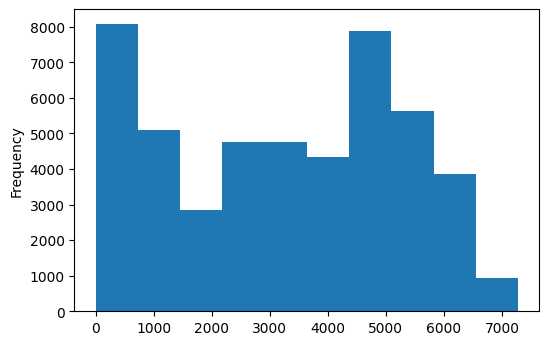

In [13]:
# to examine the distribution of the traffic_volume column plotting a histogram using pandas method
dataset['traffic_volume'].plot.hist()
plt.show()


In [14]:
dataset['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We analyzed the distribution of traffic_volume and found the following:

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

### Traffic: Day vs Night

Based on this assumption, there is slight possibility that nighttime and daytime might influence traffic volume: comparing daytime with nighttime data.<br>

We'll start by dividing the dataset into two parts:<br>

1> Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)<br>
2> Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)<br>
While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [15]:
dataset['date_time'] = pd.to_datetime(dataset['date_time'])


In [16]:
#isolating the daytime data : hours from 7 AM to 7 PM (12 hours)
daytime=dataset.copy() [(dataset['date_time'].dt.hour >=7) & (dataset['date_time'].dt.hour<19)]
print(daytime.shape)

(23877, 9)


In [17]:
#isolating the nighttime data : hours from 7 PM to 7 AM (12 hours)
nighttime=dataset.copy() [(dataset['date_time'].dt.hour <7) | (dataset['date_time'].dt.hour>=19)]
print(nighttime.shape)

(24327, 9)


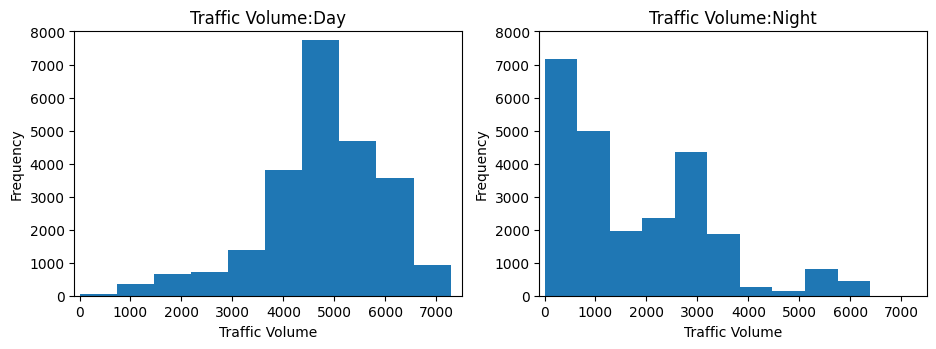

In [10]:
plt.figure(figsize=(11,3.5))
# plotting histogram to find out traffic_volume in daytime
plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic Volume:Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

# plotting histogram to find out traffic_volume in nighttime
plt.subplot (1,2,2)
plt.hist(nighttime['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic Volume:Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()


In [11]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [12]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the two histograms it is evident that traffic is light in the night time. So we can focus on the daytime traffic instead to get the better outcomes

### Looking for patterns in our data - time

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.



Hence, we can try to find how the traffic volume changes over the month, day of the week aand time of day.

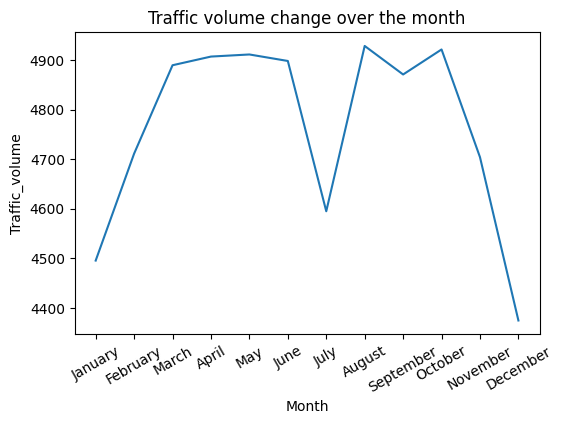

In [24]:
#plotting line chart to show traffic volume over the month
daytime['month'] = daytime['date_time'].dt.month
by_month=daytime.groupby('month').mean()
by_month['traffic_volume']
month_numbers = [1,2,3,4,5,6,7,8,9,10,11,12]
month_names = ['January', 'February', 'March','April','May','June','July','August','September','October','November','December']
plt.xticks(month_numbers, month_names,rotation=30)
plt.xlabel("Month")
plt.ylabel("Traffic_volume")
plt.title("Traffic volume change over the month")
plt.plot(by_month['traffic_volume'])
plt.show()

From the graph above it is self-explanatory that the numbers are definitely in decline and lower in the winter months, notably we see a dip in October, and then it builds back up starting in February. Strangely, There is a dip in July.

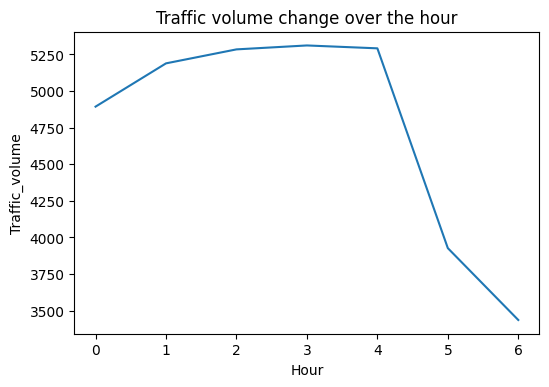

In [22]:
#plotting line chart to show traffic volume over the hour
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_days=daytime.groupby('dayofweek').mean()
by_days['traffic_volume']
plt.xlabel("Hour")
plt.ylabel("Traffic_volume")
plt.title("Traffic volume change over the hour")
plt.plot(by_days['traffic_volume'])
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.<br>

We can divivde the week days in business days (Monday- Thursday) and weekend( Friday to Sunday) and see if there's any pattern in the traffic voulme over the two separate categories.

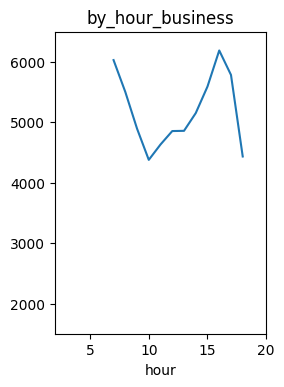

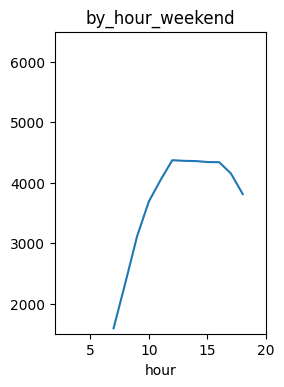

In [25]:
#plotting line chart to show pattern traffic volume on business days
daytime['hour']=daytime['date_time'].dt.hour
business_days=daytime.copy()[daytime['dayofweek']<=4]
weekend=daytime.copy()[daytime['dayofweek']>=5]
by_hour_business=business_days.groupby('hour').mean()
by_hour_weekend=weekend.groupby('hour').mean()
plt.figure()
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(2,20)
plt.ylim(1500,6500)
plt.title("by_hour_business")
plt.show()
plt.subplot(1,2,2)

#plotting line chart to show pattern traffic volume on weekends
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(2,20)
plt.ylim(1500,6500)
plt.title("by_hour_weekend")
plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7am and 4pm — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to weekends.
On business days, the rush hours are around 7am and 4pm.

#### Looking for patterns in our data - weather

The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [28]:
dataset.corr()['traffic_volume']


temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.<br>

We can now generate a scatter plot to visualize the correlation between temp and traffic_volume.

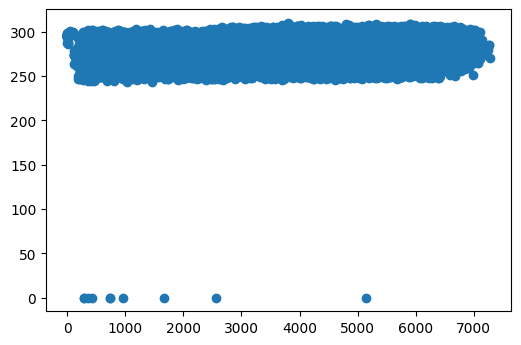

In [29]:
plt.scatter(dataset['traffic_volume'],dataset['temp'])
plt.show()

Unfortunately, we can conclude that the temperature doesn't look like a good indicator for heavy traffic. We've now looked to find correlation in the number columns for weather, but how about the the other ones, weather_main, and weather_description?

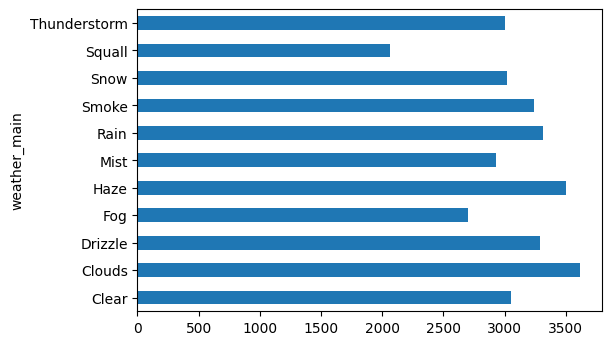

In [31]:
by_weather_main = dataset.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()



It looks like there's no weather type where the average traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Now, we will group by weather_description, and see what we can learn from that.

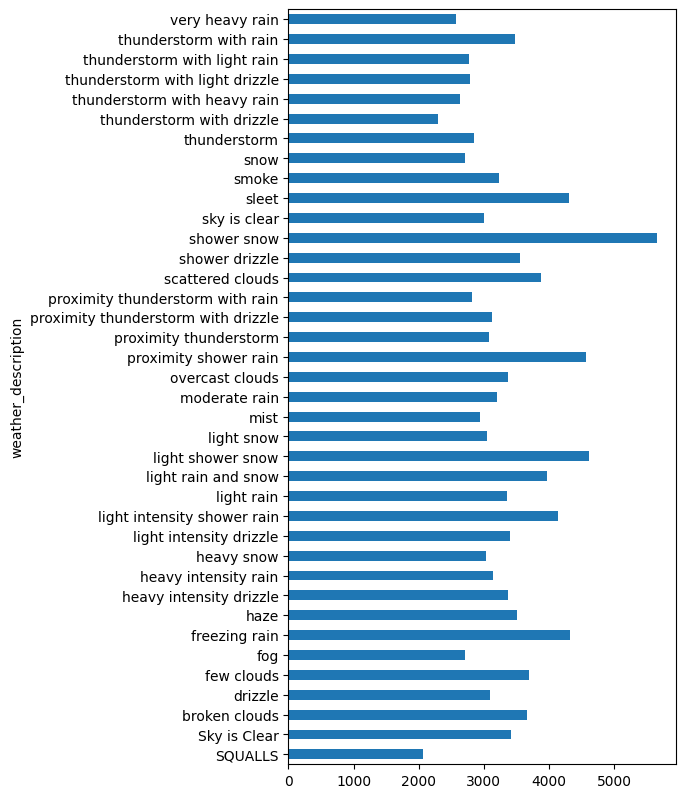

In [35]:
by_weather_description = dataset.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

Shower snow<br>
Light rain and snow<br>
Proximity thunderstorm with drizzle<br>

This shows people take their cars out of the garage when the weather is bad instead of riding a bike or walking, and when the water is absolutely terrible, they don't leave their houses at all.



#### Conclusions

In this project, I tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

#### Time indicators:
    * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    * The traffic is usually heavier on business days compared to the weekends.
    * On business days, the rush hours are around 7am and 4pm.<br>

#### Weather indicators: 
    * Shower snow
    * Light rain and snow
    * Proximity thunderstorm with drizzle
